# Principal Component Analysis
## Intuitions and practical use


## Unsupervised learning

Principal components analysis (PCA) is an unsupervised learning algorithm.

* In contrast to supervised techniques, there is **no target to predict**.
* Unsupervised algorithms aim to discover the **underlying structure** of the data.


In contrast to supervised models, such as linear regression, we are no longer trying to predict the outcome of a particular variable (such as a house price, or customer value etc.). Instead all variables are treated symmetrically -- we want to find how all variables interact with each other.

Learning the structure of the data might be learning which regions of the data space are highly probable and which regions are not. This usually involves learning (at least implicitly) relationships between all variables. In contrast to linear regression, which asks:
"how does my target variable vary with the other variables?", 
unsupervised learning asks:
"how do all variables vary with all other variables?".

## Aims of this session

* Provide a practical understanding of how PCA works and the intuition behind it.
* Demonstrate how to use PCA to explore datasets.
* Demonstrate how PCA can be used for dimensionality reduction.

## School test score data

We introduce a dataset which provides test scores of 31 students for 12 disciplines (subjects). The values are the most recent test result in each subject.

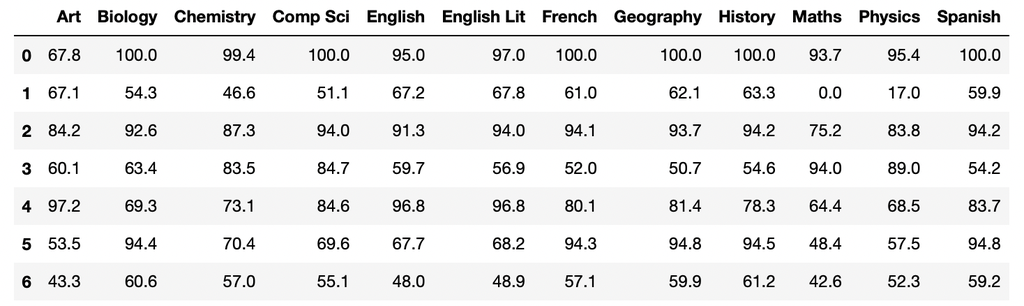

In order to explore the concept of PCA, we use a small dataset of school test scores. This dataset consists of 31 students taking 12 different subjects. Because it is a synthetic dataset, we can avoid any potential privacy concerns.

The first 7 students in the dataset are shown below in no particular order. However, if we had access to all 31 students, or even more such as 50, 100, or 200, how could we efficiently summarize the data without meticulously inspecting each individual value?

To tackle this issue, we may consider several questions, such as:
* Can we automatically **summarise** the performance of the 31 students?
* Are there any latent **traits** that can be identified among the students?
* Can we identify any **clusters** of similarly performing students or other underlying **patterns**?
* Are there any students who are unusually high or low performers??

## School test score data

* The dataset dimensions are $n=31$, $d=12$.
* How can we quickly gain an overall understanding of each student?

Visualizing a dataset in 4 or 5 dimensions can already be challenging, and it becomes even more difficult as the number of dimensions increases. This is where unsupervised learning can be extremely helpful in uncovering insights that may be hidden within a vast number of possible charts of the data.

In the context of exploratory data analysis, unsupervised learning provides a set of tools that allow us to quickly and deeply understand the structure and relationships within the data. This understanding can inform the selection of supervised learning algorithms and useful feature transformations. We may also discover unexpected relationships, or clusters of customers or anomalies that provide valuable information for experimentation or further data collection.

By gaining insights into what "typical datapoints" look like, we can use them to generate synthetic data. However, this is not a topic that will be covered in this course.

## Summarising the data

* 💡**Idea**: summarise the 12 subjects with a smaller number of variables.
* This would enable us to visualize the data and detect patterns more easily.
* The goal of this summary is to preserve as much information as possible from the original data.

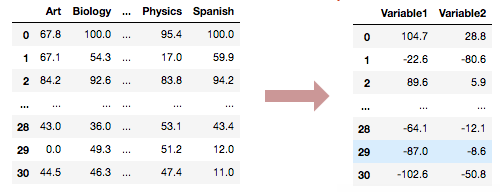

To efficiently identify differences within a dataset, it is helpful to find a summary that captures most of the inter-student features using a small number of variables. In the figure above, we can see an example of two variables being extracted from the original dataset of 12 subjects.

This approach becomes even more valuable when we summarize the data using one, two, or three variables, as it allows us to visualize the data and identify patterns using our powerful pattern-recognition abilities.

However, what does a good summary look like, and how do we know if the smaller number of variables adequately represents the original dataset? We may not define this mathematically yet, but we can state that we want the summary to capture as much information from the original dataset as possible.

In the next slide, we will explore some possible summaries.

## Summarising the data

**Idea 1**: Calculate summary statistics of the data, e.g.:
1. Mean.
2. Standard deviation.


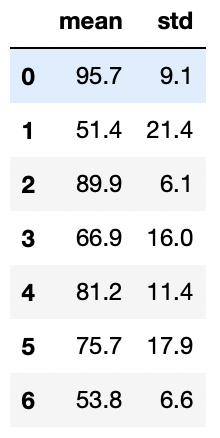

One possible summary is to calculate the mean score and standard deviation for each student across all subjects. This approach allows us to determine the average academic performance of each student and their consistency across subjects.

However, this summary only provides a starting point and does not explain the reasons for the wide variation in test scores among students. It is evident that many factors beyond our observation can influence academic performance, but we know that students often excel in some areas while struggling in others. Therefore, a subject-based summary is more appropriate.

## Summarising the data

**Idea 2:** School performance is sometimes judged based on a subset of columns, e.g.:
1. Maths.
2. English.

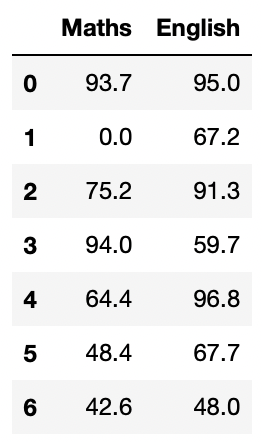

A commonly used method to summarize school performance in the UK is based on the scores of maths and English, which provides insights into a student's performance in these two areas. However, this summary only considers two out of twelve possible subjects and may not accurately reflect a student's overall academic performance. Furthermore, the summary may suffer from high variability since a student's performance in a particular test may not be representative of their overall ability.

**Do you have any thoughts as to how we might improve this?**.

To address this limitation, we need to consider a more comprehensive approach that takes into account all subjects. While we might have preconceived notions of "science" vs "arts" students, individual differences exist, and a student's performance cannot be reduced to a binary categorization. Therefore, we need a more holistic perspective to capture the nuances of each student's academic strengths and weaknesses.

## Summarising the data

* Are either of these a reasonable summary of the performance of 12 subjects?
* If we have to choose existing columns, can we find better ones than 'Maths' and 'English'?

Rather than selecting a subset of columns, why not consider **combinations** of the existing ones?

While we have discussed this concept previously, it is important to reiterate that selecting only two subjects is insufficient to capture inter-subject differences if we aim to produce a meaningful summary. Instead, we should focus on identifying a valuable *combination* of subjects that can effectively distinguish between student performance.

## Summarising the data

**Idea 3:** A combination of columns, chosen using domain knowledge, e.g.:
1. Average performance (over all subjects).
2. Relative performance in scientific subjects vs arts and humanities.

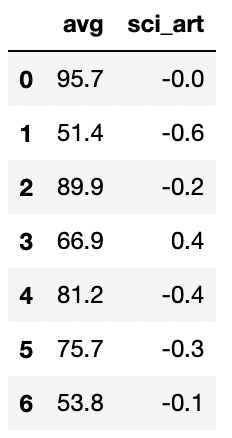

A possible summary using a combination of subjects is to use: 
    
* the average performance over *all* subjects, as a measure of how academically strong a student is, and
* some customised grouping of the remaining subjects comprising a spectrum perhaps of preference regarding scientific vs artistic subjects.\*

This avoids the high variability of the Maths vs English summary, and gives us a more rounded perspective on a student. 


## How can we perform this more generally?

* The chosen combination of features give a well rounded perspective on students' performance.
* The combination may be considered a recipe - a certain proportion of each column resulted in a good summary of the data.
* But this required expertise or a priori knowledge of the data domain.
* How can we construct a good "recipe" when the data are not well understood?

So this works well for this school dataset.

When an expert constructs a set of summary variables, one can think of this as a recipe, constructed from the raw ingredients of the original variables. Having expert access is equivalent to having a recipe book.

The unsupervised problem is equivalent to not having a recipe book. 

Is there some mathematical formulation which allows us to automatically construct recipes?


## Latent Factors

* A latent factor is an unobserved variable which contributes to the generating process of the data.
    * For example, consider a latent factor for language aptitude.
    * This may combine factors such as the language aptitude of parents, and the importance and interest given to multi-lingual capabilities.
    
    
    
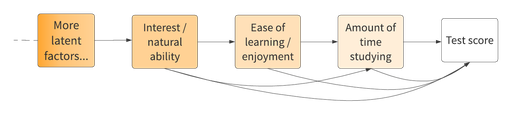

A student's test score is likely to be affected by the aptitude and interest of the student's parent(s) towards languages, and/or a personal inclination or enjoyment of them. A possible chain of causation for the test score is shown here. Any one of the points in this chain of causation may be considered a latent factor. Since these particular factors depend on each other and are all unobserved, we can reasonably group them together into a single "latent factor". We might also consider multiple independent latent factors: perhaps a student has the facility and motivation to study hard at all their subjects, regardless of any particular interest in languages. But either way, since these latent factors are influencing the test scores in French and Spanish, we should expect the resulting test scores to be correlated.

This hopefully gives a concrete example of what latent factors might look like.

## Inferring latent factors

* We are usually faced with the **inverse problem**: we know the data generated by the latent factor, but we do not observe the latent factor directly.
* Consider the following 2D dataset:
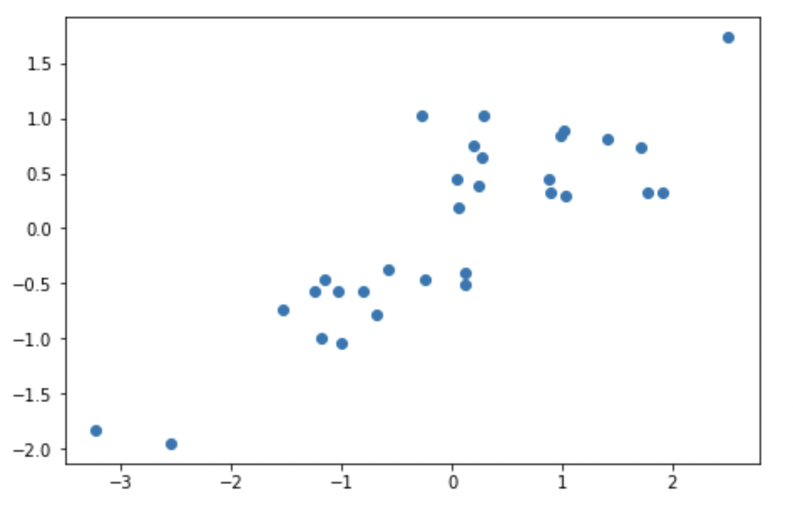


However, we are usually faced with the inverse problem. We do not **know** the values of the latent factors, we only observe the values that they help create. A typical example is shown here. Our goal is to recover the latent factor given only these observations.

## Inferring latent factors

* The values on both dimensions are **correlated**.
* Assume this is due to the effect of a latent factor.
* What is the **direction** that best captures the effect of this factor?

An obvious feature of this dataset is that the values are correlated: an increase in the $x$ value is likely associate with an increase in the $y$ value. Now, we have seen that latent variables can induce correlations in the observations, so it is reasonable to consider the presence of a latent variable. 

## Inferring latent factors

* The red arrow shows the direction corresponding to the latent factor.
* But how can we calculate it **automatically** from the data?

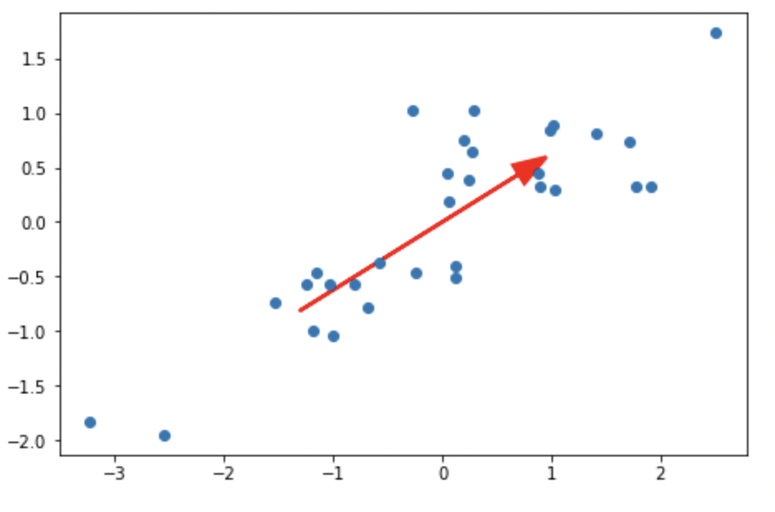



We can eyeball the best direction. But this is not enough - we want to both automate this estimation and generalise it to higher dimensions.


## Inferring latent factors

* Consider a line corresponding to a chosen direction.
* The line must go through the mean (center of mass) of the data.

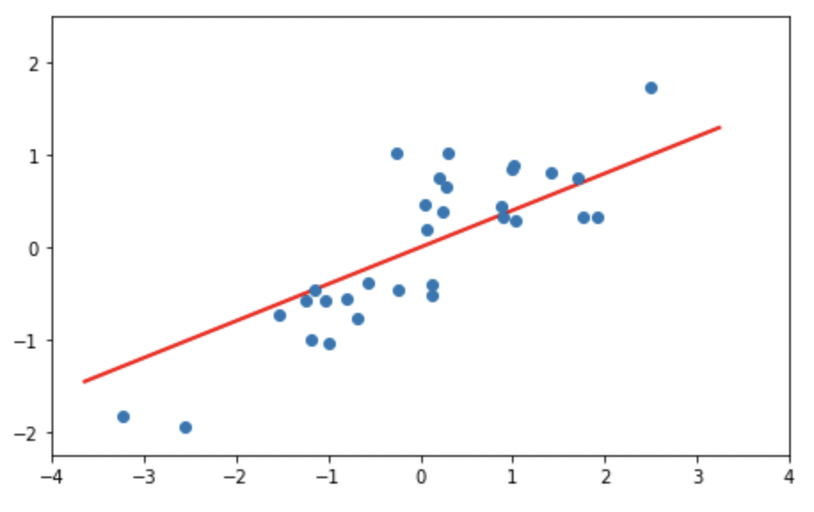

Let's introduce our method graphically. Consider any line such as the line drawn here. It looks to be oriented in roughly the right direction, but we can perhaps see that a small rotation anti-clockwise would improve the fit. 

## Inferring latent factors

* Now **project** the data onto it (i.e. find the **closest point**).

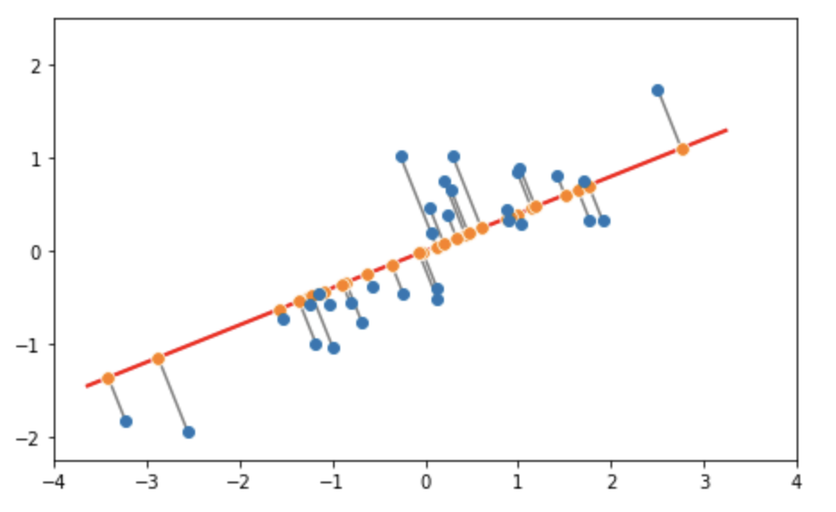

An important quantity for fitting this line will be the projections of each datapoint onto it. The projection is the closest point on the line to the datapoint in question. Each of these projections is shown in orange here.  You can see that these projections are perpendicular (or orthogonal) to the line -- any deviation from perpendicularity must be to a point that's further away (e.g. via Pythagoras).

Even with this suboptimal line, these projections still capture a reasonable summary of the overall variation. For instance, the points that are further away (at either end) are maintained by this projection. The picture looks similar to how we generated the language test scores from the latent variable, except we're doing the procedure in reverse, and using perpendicular distances to find the closest point on the line.

We've said that this line is not quite optimal.



## Inferring latent factors

* Consider all rotations of this line.
* What do you notice about these projections?


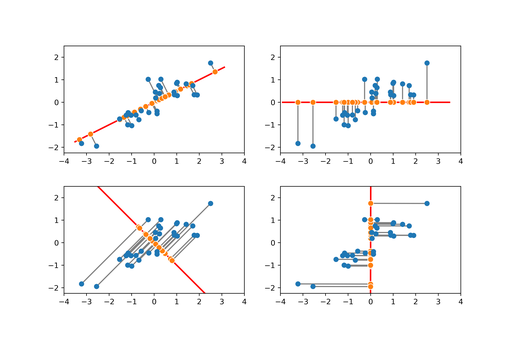



This animation shows us how these projections differ for all rotations of the line.

* **What do you notice about these projections?**

When it is aligned with the correlation direction, the projections are spread out, and when the line is at 90 degrees to this direction, the projections are close together. This suggests that the optimal direction coincides with high variance projections.

This is precisely what we will use in order to define the optimal direction.

## Inferring latent factors

* The optimal direction can be defined in two equivalent ways:
    * The **projections** have **maximal variance**.
    * The **distances to the line** (the perpendicular distances) are **minimized**.

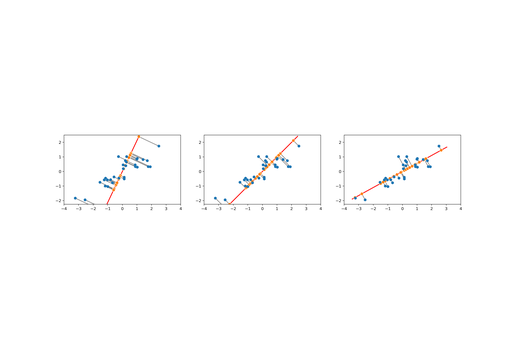



We will define the optimal direction to be the one that maximises the variance of the projections. You can see as this graph settles towards the direction of maximum variance, the projections capture the 2-dimensional data well.

An alternative perspective can also be given on this problem. Imagine that the grey lines linking the datapoints to the projections are springs that could slide without friction along the red line. This graph shows a physical simulation of how this system might settle to its point of lowest energy. The objective can therefore also be framed as minimising the distances between the datapoints and their projections onto this line. We can therefore also think of recovering latent factors as minimising some reconstruction error, as we will see later.

## Inferring latent factors

* This is our best guess about the direction of the latent factor.
* The projection captures the most variance possible, and hence the latent factor **explains as much of the data as possible**.
* It heavily relates to the correlation in $d=2$, but generalises to higher dimensions.

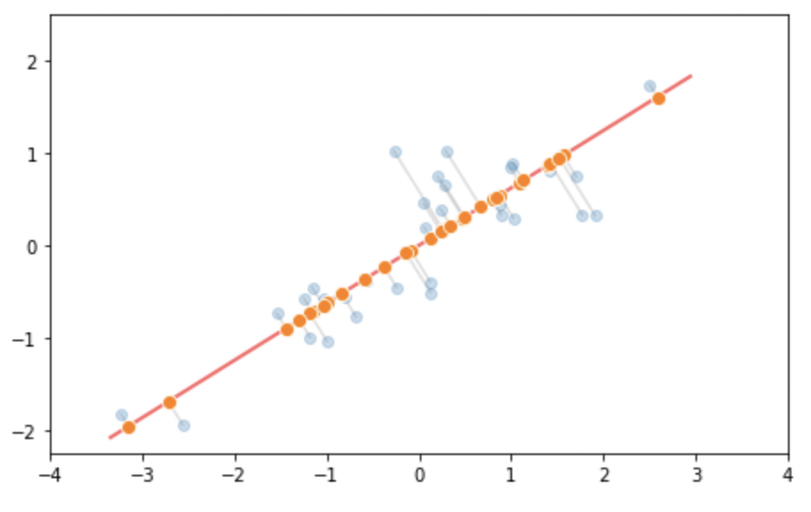



So here we show our best guess about the latent factor -- both the embedding (or direction).

You can see this lies close to the original data, capturing the most variance as possible. We will often use the language of "explaining" the data due to the fact that we've estimated latent variables which in principle might be given causal interpretation (as we saw earlier) and describe most of the data's variation.

Now in 2 dimensions, as we've mentioned, this relates to the direction of correlation. But in higher dimensions this generalises beyond correlation (which is a measure of dependence between two, and only two variables) to find directions which span multiple variables.


(🦉 *One might ask: couldn't we just use the correlation as the slope? This is a common fallacy -- the correlation is **not** the slope of this line, correlation is a measure of the variation around this line. The line itself is a function of the variances and the correlation via the Eigenvectors of the covariance matrix.*)

## Principal directions

* The new axes corresponding to the latent factors can be called **principal directions**.
* These may be considered an ordered set of axes which describe successively smaller amounts of variation in the data.

These directions are called the **principal directions** of the data.

The first principal direction captures the direction of greatest variation. The second principal direction captures the next direction of greatest variation after this, and so on.

Principal directions are always orthogonal to each other, and can, if you like, be thought of as an alternative set of axes (or "basis") for the data.

Note that the principal directions capture a more general sense of the correlation of the data, and indeed capture **all correlation** within the data. So if we look at the data within the coordinate frame of the principal directions (i.e. we rotate the space so the principal directions line up with the canonical axes ($x$, $y$, $z$)), there will be no correlation remaining.

If there were correlation remaining, this could be exploited to find a direction of even greater variation, which invalidates the claim that the principal directions are the (ordered) directions of greatest variation.

## Principal directions

* Consider our original example in $d=2$.

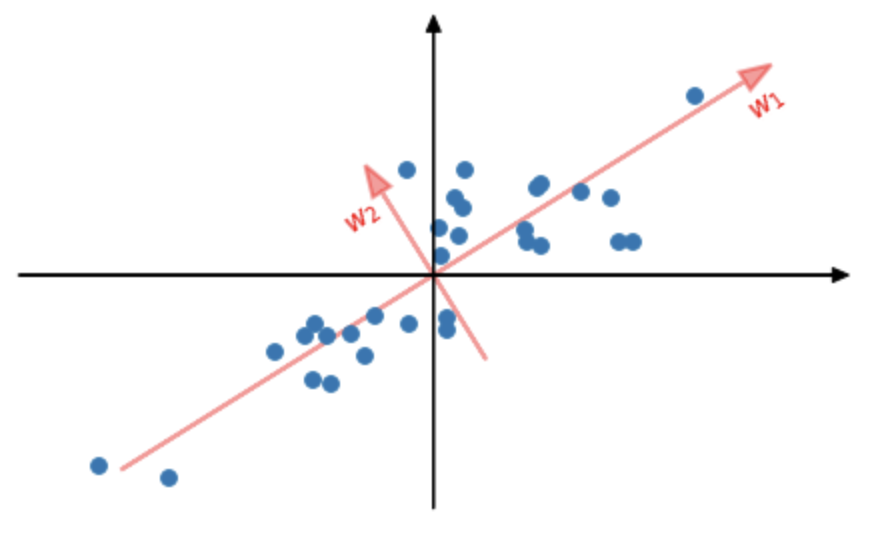



* Since $w_2$ describes a small amount of variation, we might choose to ignore it, and retain only the variation according to $w_1$.

* More generally, if we want to reduce our data to $k$ columns, we can **throw away the bottom** $d-k$ **directions**.


The two directions shown in red as $w_1$ and $w_2$ are the principal directions of this dataset. Note that principal directions can be very different depending on the dataset.

Since $w_1$ captures most of the variation, and $w_2$ relatively little, we might consider throwing away the variation in the direction of $w_2$ in order to reduce the dimensionality of our data, or to create a one-dimensional summary.

This can be extended in higher dimensions (say $d$ dimensions) to retaining only $k$ of the principal directions. We can then throw away $d-k$ directions, which may constitute a dramatic compression of the dataset. It may be that we believe that there are $k$ factors underlying the structural variation of the data: 

(e.g. in the case of the school test data, there may be ~ 3 factors corresponding to arts, science, languages)

and the rest of the variation is random fluctutations which contain little information.

This is a key idea of using principal directions, and as we will see, of Principal Components Analysis. By estimating which directions contain much variance, and which directions contain little, we can subtract the unimportant directions from our data and just consider the important ones.

Note that this assumes that the "important" directions are the high variance ones, and the "unimportant" are the low variance ones. This may not necessarily hold, but it's a reasonable first guess.

## Principal Components Analysis (PCA)

PCA consists of calculating two quantities of the data: the principal directions and the principal component scores.

The outputs of PCA are the $d \times d$ matrix $W$ and the $n \times d$ matrix $A$.


* The **principal directions** $\mathbf{w}_1 \ldots, \mathbf{w}_d$ are length $d$ vectors corresponding to the (ordered) directions of greatest variation.

* The **principal component scores** are the *projections* onto the principal directions. These are represented with a $n \times d$ matrix $A$, whose $j$th column is the projection onto the $j$th principal direction. Each column of the $n \times d$ matrix $A$ contains the projections onto the respective row of $W$.




So now we have the crucial ideas under our belt, let's define what Principal Components Analysis (or PCA) actually is.

PCA consists of the principal directions that we've just discussed, and the principal component scores. These scores are just the projections that we've seen (for instance in orange) onto the lines defined by the principal directions. PCA gives these a fancy name.

PCA is at its core just an alternative representation of the data -- it is estimating a new "set of axes" (if you like) for the data which capture the variance in decreasing order, and the co-ordinates of the data within these new axes.

Why is PCA so useful? Well, its primary use is in defining the "important" directions of the data as discussed in the previous slide. The idea is to allow us a low-dimensional summary of the data which perhaps includes the important latent factors, and ignores the uninteresting random fluctuations of the data. This is an idealised scenario, but it's this idea which underlies most of the common use of PCA.


## PCA

* PCA finds a set of directions and projections which attempt to closely approximate $X$.

You can use sklearn to find the principal directions $W$ and the component scores $A$.

```
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
```

* For the $j$th component:
    * The principal direction is the $j$th **row** of $W$ (`pca.components[j, :]`).
    * The component scores are the $j$th **column** of $A$ (`pca.transform(X)[:,j]`).

Now open the following workbook: `pca-directions.ipynb`

## Explained variance

The quality of the fit of $k$ principal components can be assessed in terms of explained variance: 

* What is the relative proportion of the total variance that is **explained** by the $k$ principal components?

<br>

$$ \textbf{% Explained variance}(k) \,\,=\,\, \frac{\frac{1}{n}\sum_{i=1}^n a_{i1}^2  + \ldots + \frac{1}{n}\sum_{i=1}^n a_{i,k}^2}{\textrm{Total variance}} $$

In sklearn, you can use `pca.explained_variance_ratio_` to get the explained variance ratio.



It is not enough to simply look at the variances of the projections, or the residuals, since we do not know a priori what a good value for these are. However, since we know that the total variance is constant for a dataset, we can instead consider what proportion of this total variance is "explained" by the variance of our projections $\{a_{i1}\}$ to $\{a_{ik}\}$. We call this metric "explained variance", and it is a value in the interval $[0,1]$.


If these $k$ directions capture most of the variance of the data, we expect this quantity to be close to 1. On the other hand, if the variables are approx. independent, and have very little correlation, we can expect this value to be close to $k/d$ (i.e. each direction contributes $1/d$).

## Explained variance

In two dimensions where $k=1$, if the explained variance:

* is close to 0.5 $\Rightarrow$ there is little to be gained;
* is close to 1.0 $\Rightarrow$ the data lie approximately on the line described by $\mathbf{w}_1$.

For higher dimensions, data are often observed in practice to be well approximated by $k < d$ directions.

The data are fitted poorly with $k=1$ in two dimensions with an explained variance of 0.5, and well with an explained variance of $\approx 1$. You can maybe decide to ignore the second direction if this value is high enough. For instance, a value of 0.9 might be appropriate in some cases.

It's common in high dimensional datasets for some strong correlations to exist, and hence the data can be well approximated by $k$ directions where $k < d$ (perhaps $k \ll d$). The more variables you collect, the more likely it is that a new variable is correlated with an existing one. 

## Practical 

Now open the following workbook: `pca-linear-regression.ipynb`